<a href="https://colab.research.google.com/github/sanamehrabbeigi/Deep-Learning-Course/blob/main/HW3_answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## تشخیص اعداد دست نویس با استفاده از شبکه‌های عصبی پیچشی


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


<div dir='rtl'style="text-align: right;font-family:verdana;">
 دسته‌بندی به کمک شبکه‌های عصبی پیچشی

هایپرپارامتر های adam به صورت دیفالت در دستور زیر انتخاب می شود و سپس در شبکه آموزش داده می شود(البته می توان از تنسورفلو تابع adam را صدا زد و به صورت دستی مقداردهی اولیه کرد.) و همچنین تعداد لایه های شبکه را 2 و تعداد نورون های هر لایه را توانی از 2 قراردادیم.

تابع فعالساز، تابع relu است و پدینگ ثابت می ماند و اضافه نمی شود.

جزئیات دیگر شبکه را در طراحی شبکه در بلوک زیر مشخص است.


In [ ]:
# Define the CNN model
def CNN_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16,(3,3),input_shape=(28,28,1),activation='relu',padding='same'),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10,activation='softmax'),
    ])
    return model


model = CNN_model()
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 10)                1

در اینجا شبکه آموزش داده شده و نمودار خطا رسم
شده است.



Epoch 1/16
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0063 - accuracy: 0.9977
Epoch 2/16
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0060 - accuracy: 0.9978
Epoch 3/16
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0061 - accuracy: 0.9981
Epoch 4/16
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0051 - accuracy: 0.9983
Epoch 5/16
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0040 - accuracy: 0.9986
Epoch 6/16
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0048 - accuracy: 0.9984
Epoch 7/16
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0037 - accuracy: 0.9988
Epoch 8/16
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0035 - accuracy: 0.9988
Epoch 9/16
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0041 - accuracy: 0.9987
Epoch 10/16
1875/1875 [==============================] - 36s 19m

Text(0.5, 0, 'epoch')

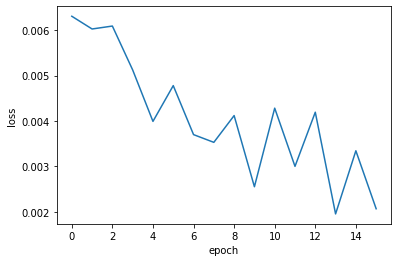

In [ ]:
# Train and test the CNN model
train_Y = tf.keras.utils.to_categorical(train_labels)
cnn_train = model.fit(train_images,train_Y,epochs=16)
plt.plot(cnn_train.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

<div dir='rtl'style="text-align: right;font-family:verdana;">

دقت ها:

 بیشتری دقت روی داده های آموزش: 0.9994
 در 16 epoch بالا مشاهده شده است.

 دقت روی داده های تست: 0.9890
 در ارزیابی پایین مشاهده می شود.


In [ ]:
#  Use the evaluate method to test the model
test_Y = tf.keras.utils.to_categorical(test_labels)
test_eval = model.evaluate(test_images,test_Y)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

313/313 [==============================] - 3s 8ms/step - loss: 0.0703 - accuracy: 0.9891
Test loss: 0.07032722234725952
Test accuracy: 0.9890999794006348


<div dir='rtl'style="text-align: right;font-family:verdana;">
در قسمت زیر می بینیم که کدام یک از شکل ها به درستی تشخیص داده نشده اند و علت آن
این است که این اشکال ناخوانا هستند و از فرم اصلی نیز خارج شده اند و حتی انسان هم ممکن است به آن ها پاسخ غلط دهد. و اگر دقت کنید به اعدادی که تشخیص داده است در برخی از موارد بسیار نزدیک می باشد و ایراد از شکل و نوع نوشتار است و به هر دو صورت می توان آن عدد را خواند.



(10000, 10) (10000, 10)


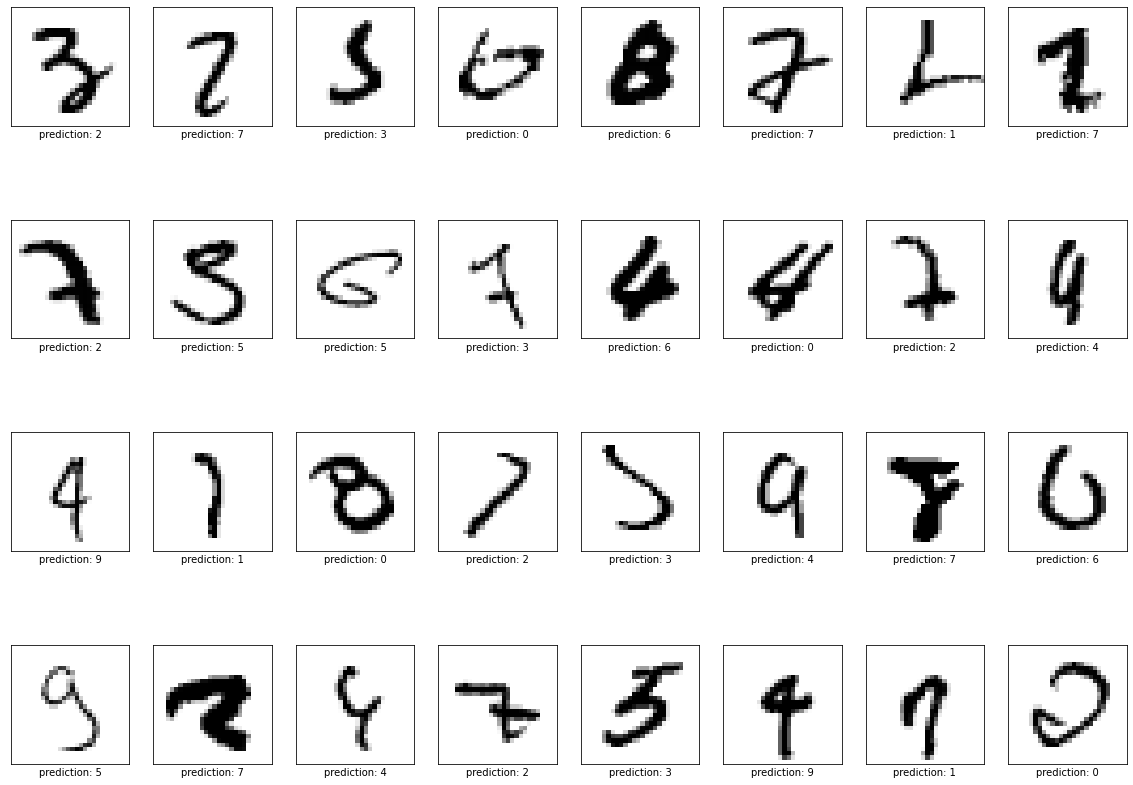

In [ ]:
#  Make predictions with the CNN model
incorrect = []
predicted_classes = model.predict(test_images)

for i,pred in enumerate(predicted_classes):
    if tf.argmax(pred) != tf.argmax(test_Y[i]):
        incorrect.append([i,tf.argmax(pred)])

print(predicted_classes.shape, test_Y.shape)

plt.figure(figsize=(20,15))

for i in range(32):
    plt.subplot(4,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.squeeze(test_images[incorrect[i][0]]), cmap=plt.cm.binary)
    plt.xlabel(f'prediction: {incorrect[i][1]}')